# Welche Tags werden auf Steam verwendet?

Alle Tags die von Steam verwendet werden, werden hier gezählt und nach ihrer Häufigkeit sortiert. Nur ein einzelner Tag wird für diese Analyse verwendet.

In [1]:
# Import
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Path to the data
data_path = '/home/jm/Desktop/Gamestar_Data/API/'

# Path for the first datafile
data_file= sorted([os.path.join(data_path, file) for file in os.listdir(data_path)])[0]

In [3]:
df_data = pd.read_json(data_file).T
df_data.head(2)

,appid,average_2weeks,average_forever,ccu,developer,median_2weeks,median_forever,name,owners,owners_variance,players_2weeks,players_2weeks_variance,players_forever,players_forever_variance,price,publisher,score_rank,tags
10,10,736,11053,19696,Valve,88,414,Counter-Strike,14170391,110949,344712,17560,9969026,93478,999,Valve,97,"{'Action': 2560, 'FPS': 1931, 'Survival': 169,..."
100,100,573,276,62,Valve,24,33,Counter-Strike: Condition Zero,11496710,100222,12637,3363,2059846,42848,999,Valve,71,"{'Action': 354, 'FPS': 274, 'Adventure': 36, '..."


In [4]:
all_tags = {}
for tags in df_data['tags'].values:
    if tags:
        for key, value in tags.items():
            if key in all_tags.keys():
                all_tags[key] += value
            else:
                all_tags[key] = value

In [5]:
df_tags = pd.DataFrame.from_dict(all_tags, orient='index').rename(columns={0:'Count'}).sort_values('Count', ascending=False).rename(columns={'Count':'Prozentanteil'})
df_tags = df_tags / df_tags.sum() * 100
df_tags.head()

,Prozentanteil
Action,6.380947
Indie,4.535468
Adventure,4.306819
Multiplayer,3.930681
Singleplayer,3.396771


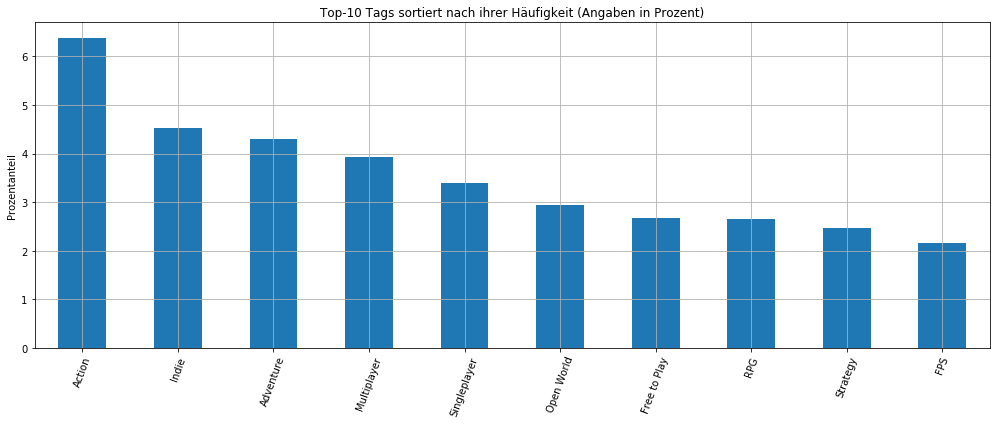

In [6]:
n = 10
df_tags[:n].plot(kind='bar', grid=True, figsize=(14,6), title='Top-{} Tags sortiert nach ihrer Häufigkeit (Angaben in Prozent)'.format(n), legend=None)
plt.ylabel('Prozentanteil')
plt.xticks(rotation=70)
plt.tight_layout()
plt.savefig('Grafiken/01_Häufigkeit_aller_Steam_Tags.pdf')
plt.show()

In [7]:
print('Es gibt auf Steam:\t{} Tags'.format(df_tags.shape[0]))

Es gibt auf Steam:	337 Tags


In [8]:
df_tags.head(30)

,Prozentanteil
Action,6.380947
Indie,4.535468
Adventure,4.306819
Multiplayer,3.930681
Singleplayer,3.396771
Open World,2.931465
Free to Play,2.676019
RPG,2.658464
Strategy,2.463320
FPS,2.162029


In [9]:
df_tags.to_csv('All_Tags_Sorted.csv')
df_tags.to_csv('Tabellen/01_Häufigkeit_aller_Steam_Tags.csv')